<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

# Ex 1. Cell sub- and supra-threshold protocols

<font size='3'>Perform subthreshold and suprathreshold stimulations (specifications bellow) on the cells that you have on your group folder (.asc files). For the passive cell properties use the parameters from tutorial 01. For the active cell parameters use the MOD files used in tutorial 01. Don't include any biophysics on the cell axon.

<font size='3'>Why do you think that these type of protocols are usefull when studying cell behavior? [1 pt]

#### Stimuli description
    
* Sub_threshold protocol: stimulation amplitude from -0.05 nA to 0.01 nA, increments of 0.008 nA.     
* Supra_threshold protocol: stimulation amplitude from 0.01 nA to 0.5 nA, increments of 0.01 nA. 

In [1]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer

### Create and instantiate cells

In [3]:
# Define NEURON class with specific morphology and channel behavior

class NEURON:
    def __init__(self, cell_name):
        self.build_morphology(cell_name)
        self.define_biophysics()
        
    def build_morphology(self, cell_name):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(cell_name)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passive properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [7]:
# Instantiate the cell
#Cell_1 = NEURON('Group_7_data/Cell1_g6.asc')
Cell_2 = NEURON('Group_7_data/Cell2_g6.asc')


15176 lines read

Group_7_data/Cell2_g6.asc problems


Main branch starting at line 8896 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


### Subthreshold stimulation - Cell 1

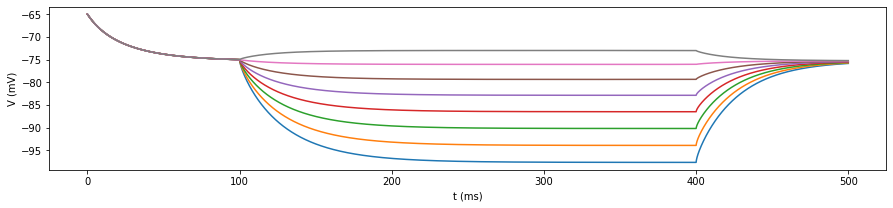

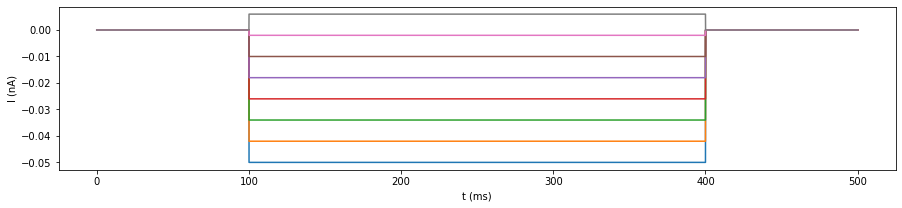

In [5]:
stim_ampl = np.arange(-0.05, 0.01, 0.008)


# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell_1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell_1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

### Subthreshold stimulation - Cell 2

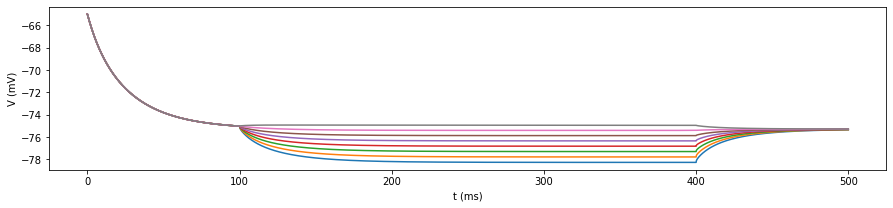

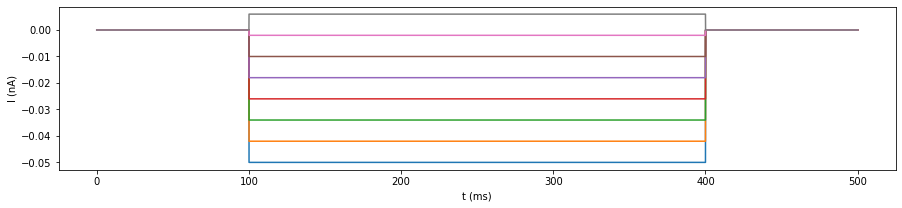

In [18]:
stim_ampl = np.arange(-0.05, 0.01, 0.008)


# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell_2.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell_2.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

### Suprathreshold stimulation - Cell 1

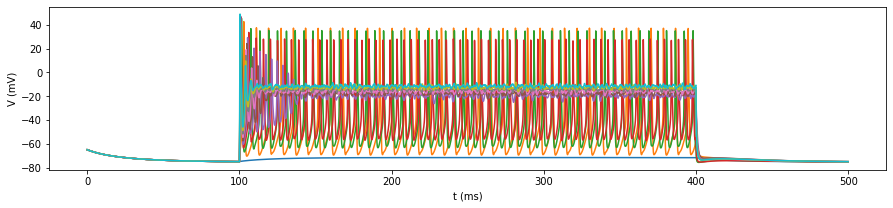

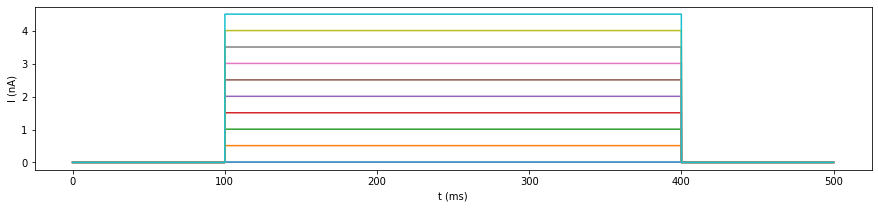

In [6]:
import pickle

stim_ampl = np.arange(0.01, 5.0, 0.5)


# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

listTracesCell1 = []

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell_1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell_1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)
    trace = {'T': rec_t.to_python(), 'V': rec_v_soma.to_python(), 'stim_start': [100], 'stim_end': [400]}
    listTracesCell1.append(trace)

outfile = open('listTracesCell1','wb') 
pickle.dump(listTracesCell1,outfile)
outfile.close()

### Suprathreshold stimulation - Cell 2

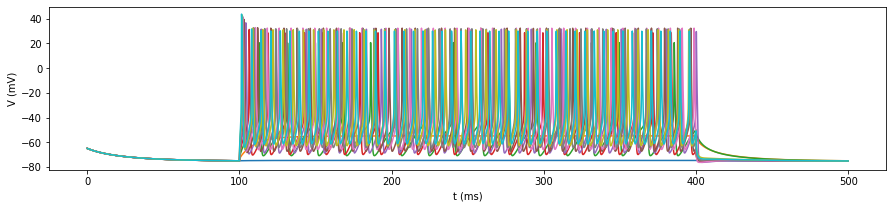

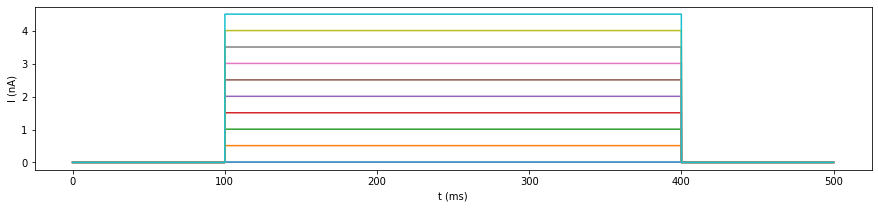

In [8]:
import pickle

stim_ampl = np.arange(0.01, 5.0, 0.5)


# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

listTracesCell2 = []

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell_2.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell_2.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)
    
    trace = {'T': rec_t.to_python(), 'V': rec_v_soma.to_python(), 'stim_start': [100], 'stim_end': [400]}  
    listTracesCell2.append(trace)
    
outfile = open('listTracesCell2','wb') 
pickle.dump(listTracesCell2,outfile)
outfile.close()

These types of experiments are useful for studying cell behavior because they allow for the measurement of metrics, such as, in the subthreshold condition, peak subtrheshold voltage and time constant, and in the suprathreshold condition, mean frequency and AHP depth, that are useful for optimizing cell models.

# Ex 2. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the inter-spike-interval (ISI), firing frequency and after-hiperpolarization depth (AHP-depth) from the recordings that you can find in your folder group (.dat files). Extract the asked features from the stimulation or stimulations protocols that you think you can an extract the features.

<font size='3'>You can compute it as you wish, using eFEL, scipy.signal  or creating your own functions. [1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").

In [9]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import efel
from json2html import *
import IPython

In [10]:
# store files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]


APWaveform_lst = [[],[]]
FirePattern_lst = [[],[]]
IV_lst = [[],[]]


for i in range(2):
    for j in range(2,8):
        APWaveform_lst[i].append("Group_7_data/exp_APWaveform_ch" + str(i+6) + "_104" + str(j) + ".dat")
        
    for j in range(2,4):
        FirePattern_lst[i].append("Group_7_data/exp_FirePattern_ch" + str(i+6) + "_5" + str(j) + ".dat")
        
    for j in range(31,42):
        IV_lst[i].append("Group_7_data/exp_IV_ch" + str(i+6) + "_20" + str(j) + ".dat")

trace_files = {"AP": APWaveform_lst, "FP": FirePattern_lst, "IV": IV_lst}     


### We plot the traces in order to understand which ones are worthy of extracting the features from

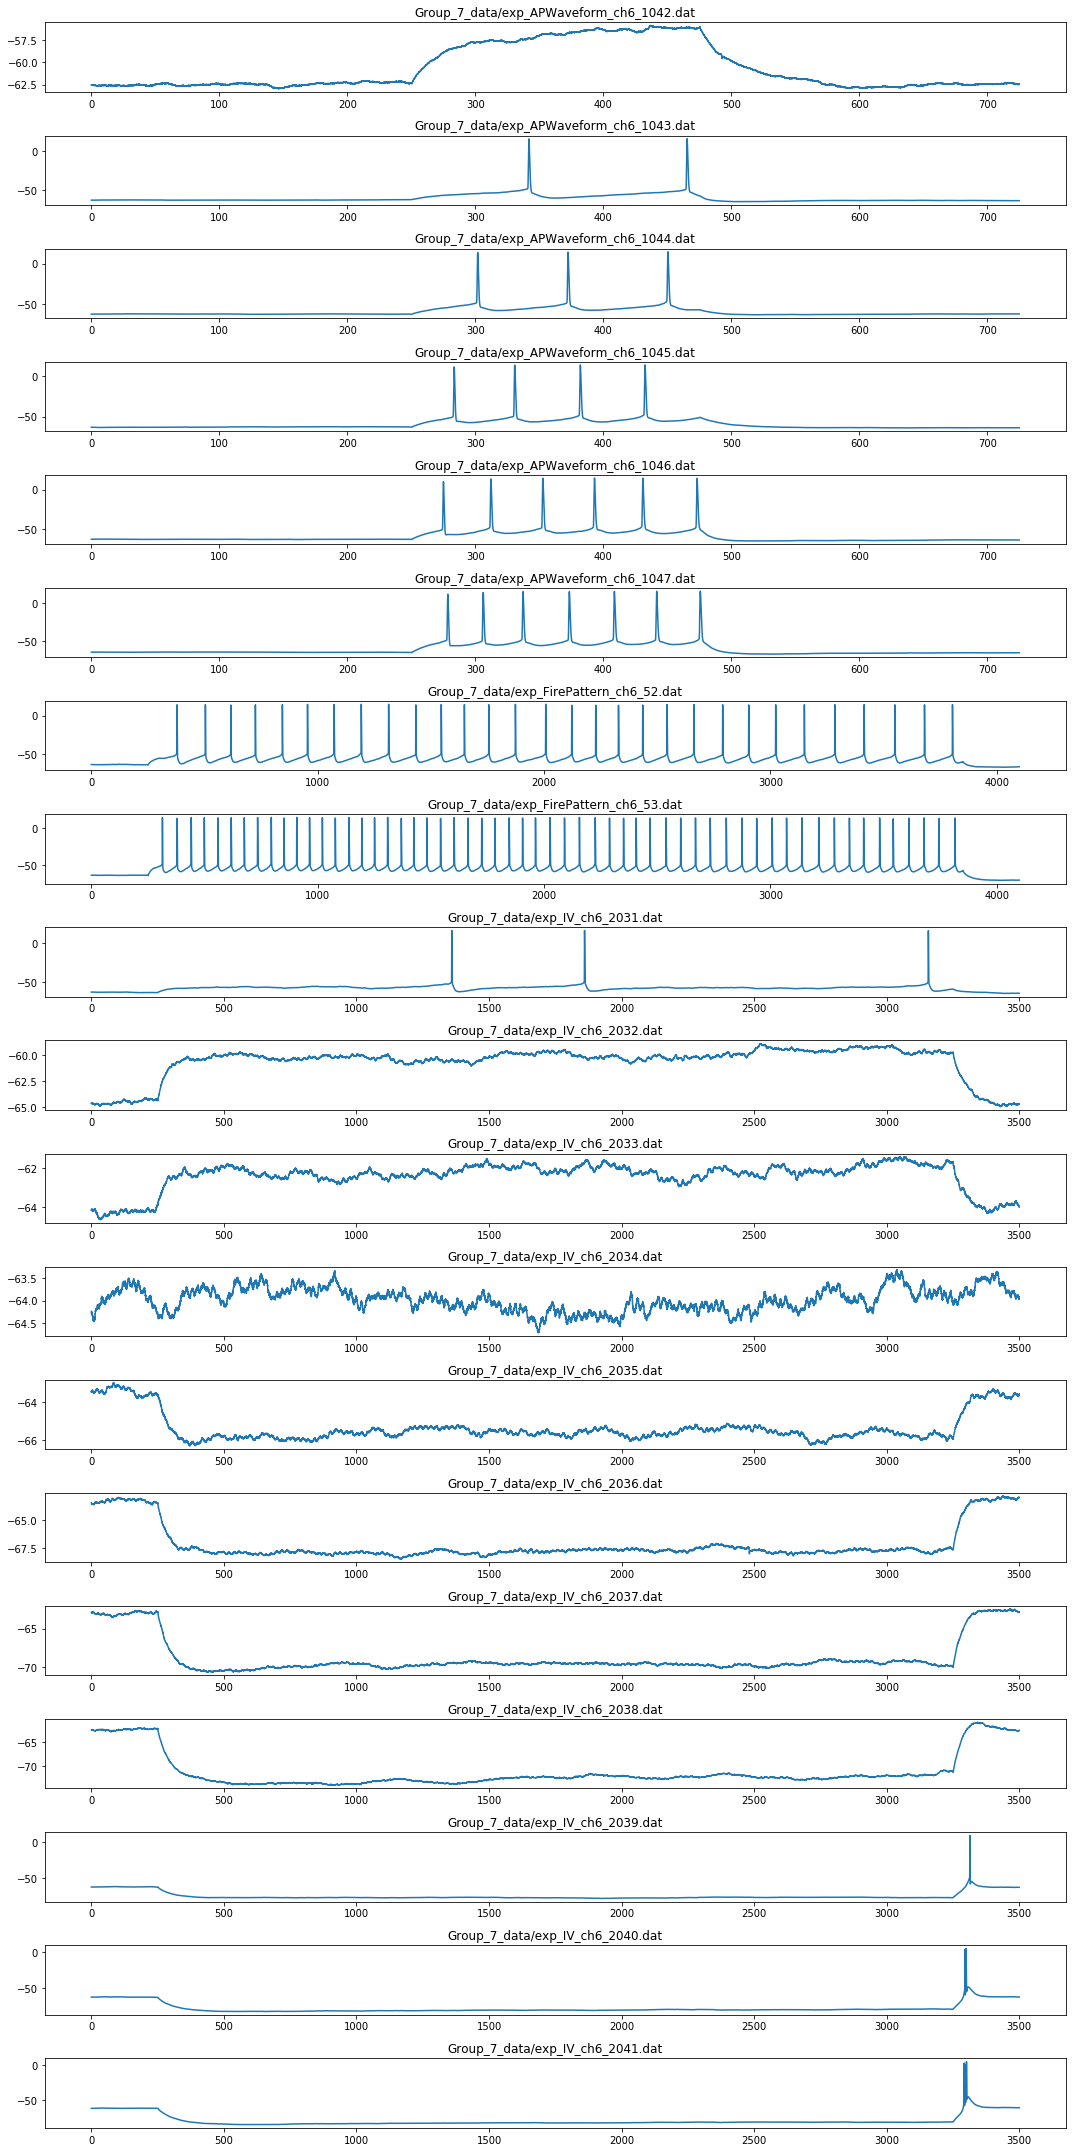

In [4]:
# PLOT

counter = 0
fig, axs = plt.subplots(19, figsize=(15, 30))

for stimulus in trace_files:
    
    stim_lst = trace_files[stimulus]
    
    for i in range(len(stim_lst[0])):
        t, v = get_data(stim_lst[0][i])
        axs[counter].plot(t,v)
        axs[counter].title.set_text(stim_lst[0][i])
        counter += 1

fig.tight_layout()

### APWaveform_ch6_1044 - APWaveform lower amplitude

In [26]:
file_v1 = "Group_7_data/exp_APWaveform_ch6_1044.dat"
file_c1 = "Group_7_data/exp_APWaveform_ch7_1044.dat"


t, v = get_data(file_v1)
t, i = get_data(file_c1)

import efel
from json2html import *
import IPython

stim_start = 378.9 # in ms
stim_end = 3681.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['ISI_values', 'mean_frequency', 'AHP_depth_abs'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

ISI_values,78.00000000001774
mean_frequency,13.96648044692075
AHP_depth_abs,-58.45000076293505-58.01874923704211-57.61249923706055


### APWaveform_ch6_1047 - APWaveform higher amplitude

In [27]:
file_v1 = "Group_7_data/exp_APWaveform_ch6_1047.dat"
file_c1 = "Group_7_data/exp_APWaveform_ch7_1047.dat"


t, v = get_data(file_v1)
t, i = get_data(file_c1)

import efel
from json2html import *
import IPython

stim_start = 378.9 # in ms
stim_end = 3681.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['ISI_values', 'mean_frequency', 'AHP_depth_abs'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

ISI_values,31.1000000000070736.2000000000082335.20000000000800433.000000000007534.10000000000775
mean_frequency,30.959752321968736
AHP_depth_abs,-55.61249923706055-53.206253051755056-55.28750228881136-54.95000076294553-53.83124923704371-53.79999923706055-65.19999694824219


### FirePattern_ch6_52 - FirePattern lower amplitude

In [28]:
file_v1 = "Group_7_data/exp_FirePattern_ch6_52.dat"
file_c1 = "Group_7_data/exp_FirePattern_ch7_52.dat"


t, v = get_data(file_v1)
t, i = get_data(file_c1)

import efel
from json2html import *
import IPython

stim_start = 378.9 # in ms
stim_end = 3681.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['ISI_values', 'mean_frequency', 'AHP_depth_abs'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

ISI_values,112.70000000002557108.2000000000246119.30000000002713111.10000000002526117.49999999997124119.99999999989086120.89999999989004120.19999999989068112.39999999989777102.09999999990714108.09999999990168117.39999999989323133.89999999987822114.99999999989541105.9999999999036100.4999999999086107.0999999999026107.59999999990214118.39999999989232127.29999999988422115.09999999989532119.09999999989168126.69999999988477134.8999999998773129.2999999998824135.69999999987658130.89999999988095123.6999999998875
mean_frequency,8.82862998581707
AHP_depth_abs,-62.15624999999463-60.637500762933286-60.23749923706055-60.45625305175155-60.20000076293151-60.23125076293945-60.30000305175781-60.29375076293803-60.05624771115282-60.25625228881836-59.51874923704023-60.17499923706055-59.95000076287476-60.01874923698238-60.26250076293945-59.668750762886255-60.118751525878906-60.162502288753394-60.11875152566609-60.374999999614744-60.53749847378529-60.900001525878906-60.68125152539048-60.85625076252151-60.65624999988836-60.656249999880686-61.00624847386798-61.08750152561008-60.79375076279761-60.931247710437226


### FirePattern_ch6_53 - FirePattern higher amplitude

In [29]:
file_v1 = "Group_7_data/exp_FirePattern_ch6_53.dat"
file_c1 = "Group_7_data/exp_FirePattern_ch7_53.dat"


t, v = get_data(file_v1)
t, i = get_data(file_c1)

import efel
from json2html import *
import IPython

stim_start = 378.9 # in ms
stim_end = 3681.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['ISI_values', 'mean_frequency', 'AHP_depth_abs'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

ISI_values,62.1000000000141257.7000000000131260.500000000013758.500000000013357.600000000013158.9000000000133960.50000000001375656.300000000012856.300000000012856.40000000001282456.6000000000128757.29999999995152460.799999999944756.29999999994879556.29999999994879557.6999999999475260.49999999994497655.29999999994970557.6999999999475260.49999999994497659.9999999999454360.799999999944760.9999999999445258.0999999999471663.3999999999423459.0999999999462556.9999999999481664.6999999999411663.4999999999422565.8999999999400669.8999999999364362.999999999942762.0999999999435255.6999999999493461.1999999999443470.8999999999355264.5999999999412565.3999999999405265.199999999940770.8999999999355269.1999999999370665.199999999940768.499999999937763.4999999999422567.4999999999386174.7999999999319768.7999999999374366.4999999999395262.999999999942770.5999999999357960.0999999999453469.0999999999371566.6999999999393465.4999999999404371.29999999993515
mean_frequency,16.36314051090477
AHP_depth_abs,-59.743747711180596-58.74375152587634-58.48749923705402-57.88750076293945-57.75624847411336-58.200000762930046-57.88124847411559-58.02500152587253-58.056251525871666-57.168750762923395-57.349998474121094-57.43124771117203-57.450000762920126-58.29999923706055-57.775001525878906-57.20000076293945-57.099998474121094-57.912498474114415-57.150001525848296-57.69999694822879-58.374999999983366-58.02500152573815-57.89374923698969-57.90000152585201-58.21874999993903-58.537498474019806-57.656249999887756-57.59374999995927-57.99999999995599-58.193748474026016-57.96874999984602-58.931251525878906-58.337501525819796-58.412502288693204-58.02500152581266-58.15624999972293-58.47499847390282-58.25625228843433-58.424999236738564-58.368751525794664-58.799999236884716-58.29999923706055-59.01875305147025-58.58750152558015-58.59374999989657-58.468749999678735-58.687499999667395-59.32500076259372-58.83124923682243-58.412502288695364-59.56249999974692-58.999999999608654-58.99999999946447-58.993751525878906-58.956249236777396-58.64374923647909-59.287502288668804


# Ex 3. Combine Ex 1 and Ex 2

<font size='3'>Extract the firing frequency and the AHP-depth from the experiments that you have performed on exercise 1 on the cells from your group folder. 
    
<font size='3'>Do you see any difference between both cells? If yes, what differences? Would you be able to clasify the cells based on these differences? [1.5 pts]

/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_frequency: 
Voltage never goes below or above threshold in spike detection.

  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth_abs: 
 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_frequency: 
Voltage never goes below or above threshold in spike detection.

  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth_abs: 
 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)


Text(0, 0.5, 'AHP depth')

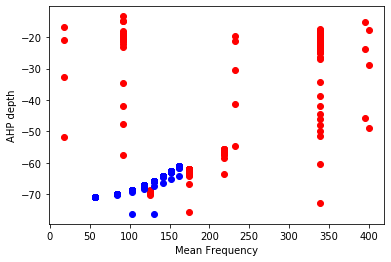

In [116]:
import efel
import pickle
import matplotlib.pyplot as plt


for file in range(1,3):
    infile = open('listTracesCell'+str(file),'rb')
    traces = pickle.load(infile)
    infile.close()
    
    if file == 1:
        mean_freq1 = np.ones(len(traces))*np.nan
        AHP1 = np.ones(len(traces))*np.nan
        AHPVars1 = np.ones(len(traces))*np.nan
    else:
        mean_freq2 = np.ones(len(traces))*np.nan
        AHP2 = np.ones(len(traces))*np.nan
        AHPVars2 = np.ones(len(traces))*np.nan

    for i, trace in enumerate(traces):
        results = efel.getFeatureValues([trace], ['mean_frequency', 'AHP_depth_abs'])[0]
        
        if file == 1:
            
            if results['mean_frequency'] is not None:
                mean_freq1[i] = results['mean_frequency'] 
                plt.plot(np.ones(len(results['AHP_depth_abs']))*results['mean_frequency'],results['AHP_depth_abs'],'ro')
            if results['AHP_depth_abs'] is not None: 
                AHP1[i] = np.mean(results['AHP_depth_abs'])
                AHPVars1[i] = np.std(results['AHP_depth_abs'])
        else:
            if results['mean_frequency'] is not None:
                plt.plot(np.ones(len(results['AHP_depth_abs']))*results['mean_frequency'],results['AHP_depth_abs'],'bo')
                mean_freq2[i] = results['mean_frequency']
            if results['AHP_depth_abs'] is not None:
                AHP2[i] = np.mean(results['AHP_depth_abs'])
                AHPVars2[i] = np.std(results['AHP_depth_abs'])
                
plt.xlabel('Mean Frequency')
plt.ylabel('AHP depth')


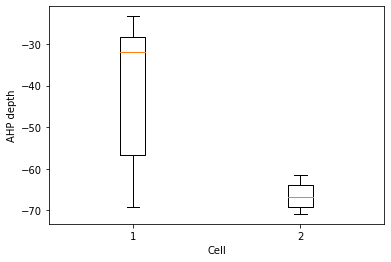

In [85]:
plt.figure()
plt.boxplot([AHP1[np.where(~np.isnan(AHP1))],AHP2[np.where(~np.isnan(AHP2))]])
plt.xlabel('Cell')
plt.ylabel('AHP depth')
plt.show()

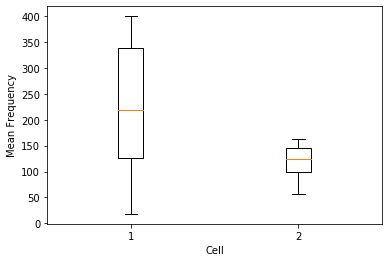

In [86]:
plt.figure()
plt.boxplot([mean_freq1[np.where(~np.isnan(mean_freq1))],mean_freq2[np.where(~np.isnan(mean_freq2))]])
plt.xlabel('Cell')
plt.ylabel('Mean Frequency')
plt.show()

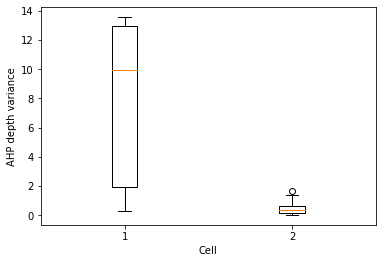

In [105]:
plt.figure()
plt.boxplot([AHPVars1[np.where(~np.isnan(AHPVars1))],AHPVars2[np.where(~np.isnan(AHPVars2))]])
plt.xlabel('Cell')
plt.ylabel('AHP depth variance')
plt.show()

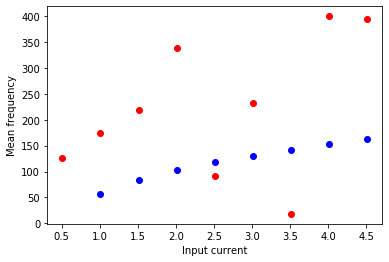

In [119]:
plt.figure()
plt.plot(np.arange(0.01,5.,0.5),mean_freq1,'or')
plt.plot(np.arange(0.01,5.,0.5),mean_freq2,'ob')
plt.xlabel('Input current')
plt.ylabel('Mean frequency')
plt.show()

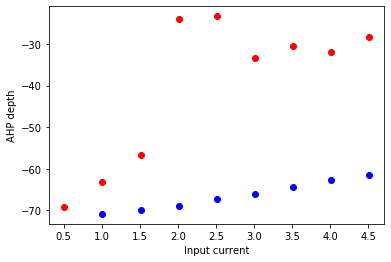

In [121]:
plt.figure()
plt.plot(np.arange(0.01,5.,0.5),AHP1,'or')
plt.plot(np.arange(0.01,5.,0.5),AHP2,'ob')
plt.xlabel('Input current')
plt.ylabel('AHP depth')
plt.show()

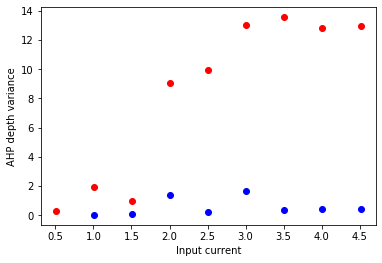

In [123]:
plt.figure()
plt.plot(np.arange(0.01,5.,0.5),AHPVars1,'or')
plt.plot(np.arange(0.01,5.,0.5),AHPVars2,'ob')
plt.xlabel('Input current')
plt.ylabel('AHP depth variance')
plt.show()

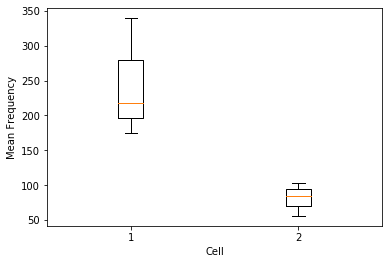

In [110]:
plt.figure()
plt.boxplot([mean_freq1[2:5],mean_freq2[2:5]])
plt.xlabel('Cell')
plt.ylabel('Mean Frequency')
plt.show()

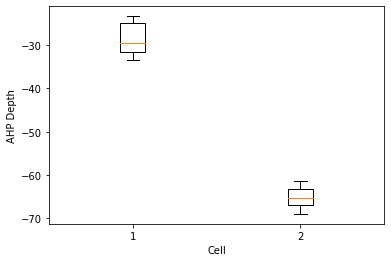

In [125]:
plt.figure()
plt.boxplot([AHP1[4:],AHP2[4:]])
plt.xlabel('Cell')
plt.ylabel('AHP Depth')
plt.show()

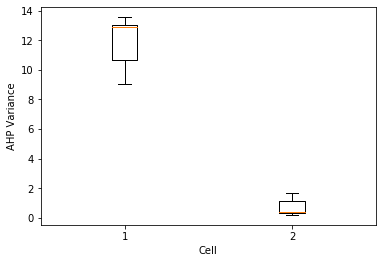

In [124]:
plt.figure()
plt.boxplot([AHPVars1[4:],AHPVars2[4:]])
plt.xlabel('Cell')
plt.ylabel('AHP Variance')
plt.show()

We observe that for Cell 1, mean frequency tends to be higher, and absolute AHP depth lower, than for Cell 2. In addition, there is greater variance in AHP depth for each experiment. However, the variance in these metrics is too high to permit classification. However, mean frequency for input current less than 2.5 nA can be used to classify cells, as can AHP Depth and Variance for input currents greater than 2.0 nA.

# Ex 4. Genetic Algorith (Optimization)

<font size='3'>Change the GA code in such a way that instead of the Spikecount feature, we search for a solution with AP_width of 1.3 for stim_amp = 0.1 nA and AP_width of 1.6 for stim_amp = 0.5 nA.
    
<font size='3'>As you can see the optimization algoithm explained in the tutorial is too simple and it gives a lot of possible solutions. Explain how you could complete the algorithm, so the number of solutions gets better constrained. [2 pts]

In [7]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h

# Cretae ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

1.7999999999998977


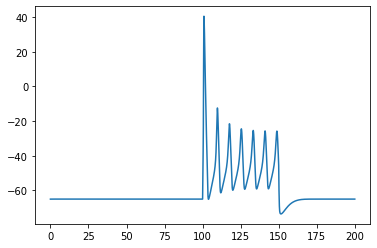

In [8]:
import efel


# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp, get_trace=False ):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    # AP_width of 1.3 for stim_amp = 0.1 nA and AP_width of 1.6 for stim_amp = 0.5 nA.
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [200]}

    feature_values = efel.getFeatureValues([trace], ['AP_width'])[0]
    
    if get_trace:
        return feature_values, rec_t, rec_v_soma
    else:
        return feature_values

# RUN to test
feat, rec_t, rec_v_soma = stimulation(0.5, True)
print(feat['AP_width'][0])
    
plt.plot(rec_t, rec_v_soma);

**We can see that in case of I=0.5 there are multiple oscillations so we always choose the first oscillation.**

## Step 1: Create a starting random population

<font size='3'>The first step will be to create a random population of [gnabar, gkbar], knowing that the values for both variables are between 0 and 1.

In [9]:
import random
import numpy as np
import efel

def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

# RUN to test
gna_min = 0
gna_max = 1
gk_min = 0
gk_max = 1
pop_size = 10

pop = create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size)
print (pop)

[[0.65093341 0.23592664]
 [0.47544381 0.36269749]
 [0.92883464 0.18956623]
 [0.71142055 0.39924715]
 [0.3474484  0.57846282]
 [0.38211628 0.58061079]
 [0.39966389 0.31830843]
 [0.57198186 0.26242113]
 [0.0368714  0.23380677]
 [0.68471599 0.80979233]]


## Step 2: Calculate fitness of population

<font size='3'>In GAs we refer to how good each individual in the population is as ‘fitness’. The calculate_fitness function will be the evaluation procedure you wish to apply in your algorithm. In this example we are going to return the number of genes (elements) in a potential solution (chromosome) that match our f=reference standard.

In [11]:
def calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2):
    '''Goals can be anything but here thay are 'AP_width' for the correspoinding stim_amp'''
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
        fits = []
        for g, st in zip([goal1, goal2], [stim_amp1, stim_amp2]):
            AP_width = stimulation(st) # 0.5 is the amplitud stimulation
            if AP_width['AP_width'] is not None:
                value = AP_width['AP_width'][0]
            else: # if no AP set the width very large so the error gets very large
                value = 1e10  
            fit = np.abs(g - value)
            fits.append(fit)
        scores.append(np.mean(fits)) # for each indiv their goodness is the mean of the fitness for two goeals ! 
    return scores



# RUN to test
# AP_width of 1.3 for stim_amp = 0.1 nA and AP_width of 1.6 for stim_amp = 0.5 nA.
stim_amp1 = 0.1 # nA
goal1 = 1.3 
stim_amp2 = 0.5 # nA
goal2 = 1.6 

fit_scor = calculate_fitness(pop, goal1, stim_amp1, goal2, stim_amp2)
print(fit_scor)

[0.29999999999990046, 0.1000000000000768, 0.6499999999998806, 0.15000000000000002, 4999999999.6, 4999999999.6, 0.1000000000000768, 0.19999999999990614, 4999999999.950001, 4999999999.5]


## Step 3: Choosing individuals to breed with tournament selection

<font size='3'>Genetic algorithms mimic biology in that the individuals with the best fitness scores are most likely to breed and pass on their genes. But we do not simply take all the best individuals from our population to breed, as this might risk ‘in-breeding’. Rather, we use a method that means better individuals are moire likely to breed, but low fitness individuals at times may be chosen to breed.

<font size='3'>In tournament selection we first choose two individuals at random from our population (it is possible that two low fitness individuals may be chosen). We then pass those individuals to a ‘tournament’ where the individual with the highest fitness will be chosen.

<font size='3'>It is possible to further modify this so that the highest fitness individual will win with a given probability, but we will keep it simple here and have the highest fitness individual always winning. It is also possible to have more than two individuals in a tournament. The more individuals in a tournament the more the picked population will be biased towards the highest fitness individuals.

In [12]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify individual with smallest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return winner
    return population[winner, :]

# RUN to test
parent1 = select_individual_by_tournament(pop, fit_scor)
parent2 = select_individual_by_tournament(pop, fit_scor)
parent3 = select_individual_by_tournament(pop, fit_scor)
parent4 = select_individual_by_tournament(pop, fit_scor)
parent5 = select_individual_by_tournament(pop, fit_scor)
parent6 = select_individual_by_tournament(pop, fit_scor)
print(parent1)
print(parent2)
print(parent3)
print(parent4)
print(parent5)
print(parent6)

[0.57198186 0.26242113]
[0.57198186 0.26242113]
[0.65093341 0.23592664]
[0.71142055 0.39924715]
[0.92883464 0.18956623]
[0.3474484  0.57846282]


## Step 4: Producing children from parents – crossover

<font size='3'>When two individuals are chosen, the next step is to produce ‘children’ from them. We produce these children by ‘crossover’ mix of their values. One ‘child’ will take the gnabar from parent 1 and gkbar from parent 2. The result is a mix of "genes" from each parent. The second ‘child’ will be the opposite of this.

<font size='3'>It is possible to have more than one crossover point, but we will keep it simple and have a single crossover point.

In [13]:
def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

child1, child2 = breed_by_crossover(parent1, parent2)
child3, child4 = breed_by_crossover(parent3, parent4)
child5, child6 = breed_by_crossover(parent5, parent6)

print (child1)
print (child2)
print (child3)
print (child4)
print (child5)
print (child6)

[0.57198186 0.26242113]
[0.26242113 0.57198186]
[0.65093341 0.39924715]
[0.23592664 0.71142055]
[0.92883464 0.57846282]
[0.18956623 0.3474484 ]


## Step 5: Random mutation of genes

<font size='3'>In evolution sometimes genes are copied incorrectly. This change may be harmful or beneficial. We mimic this by having a certain probability of that a conductance ("gene") becomes switched.

<font size='3'>Typically this probability is low (e.g. 0.005), though it can be made to be flexible (e.g. increase mutation rate if progress has stalled)

In [14]:
def randomly_mutate_population(population, mutation_probability):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

#RUN to test
new_pop = np.stack((child1, child2))
print (new_pop)

mut_pop = randomly_mutate_population(new_pop, 0.25)
print (mut_pop)


[[0.57198186 0.26242113]
 [0.26242113 0.57198186]]
[[0.57198186 0.26242113]
 [0.26242113 0.57198186]]


## Step 6: Putting it all together

<font size='3'>We’ve defined all the functions we need. Now let’s put it all together.

/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

No spike in trace.

  RuntimeWarning)


Starting best score: 0.100 (gna = 0.86, gk = 0.47)
Starting best score: 0.100 (gna = 0.30, gk = 0.14)
Starting best score: 0.100 (gna = 0.65, gk = 0.40)
Starting best score: 0.100 (gna = 0.94, gk = 0.64)
Generation 0 best score: 0.100 (gna = 0.93, gk = 0.59)
Generation 0 best score: 0.100 (gna = 0.40, gk = 0.26)
Generation 0 best score: 0.100 (gna = 0.86, gk = 0.47)
Generation 0 best score: 0.100 (gna = 0.85, gk = 0.47)
Generation 0 best score: 0.100 (gna = 0.51, gk = 0.30)
Generation 1 best score: 0.100 (gna = 0.47, gk = 0.30)
Generation 1 best score: 0.100 (gna = 0.44, gk = 0.28)
Generation 2 best score: 0.100 (gna = 0.85, gk = 0.47)
Generation 2 best score: 0.100 (gna = 0.83, gk = 0.46)
Generation 2 best score: 0.100 (gna = 0.66, gk = 0.44)
Generation 3 best score: 0.150 (gna = 0.93, gk = 0.55)
Generation 3 best score: 0.150 (gna = 0.40, gk = 0.27)
Generation 3 best score: 0.150 (gna = 0.66, gk = 0.46)
Generation 3 best score: 0.150 (gna = 0.84, gk = 0.44)
Generation 4 best score: 0

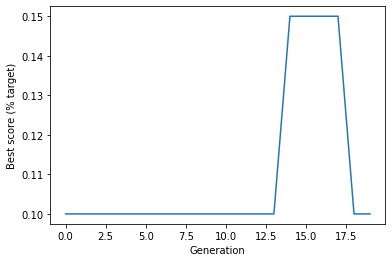

In [36]:
# Set general parameters
population_size = 50
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0

# AP_width of 1.3 for stim_amp = 0.1 nA and AP_width of 1.6 for stim_amp = 0.5 nA.
stim_amp2 = 0.1 # nA
goal2 = 1.3 
stim_amp2 = 0.5 # nA
goal2 = 1.6 

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.3f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    #pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    #best_score = np.min(pop_scores)
    best_score = np.min(fit_scores)
    
    for i in range(len(fit_scores)):
        if fit_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.3f (gna = %.2f, gk = %.2f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

As you can see the optimization algoithm explained in the tutorial is too simple and it gives a lot of possible solutions. Explain how you could complete the algorithm, so the number of solutions gets better constrained.

## Answer:
one way would be to incraese the number of generations to get more variation on the values of population.
we could also limit the max and min values of conductances even more. 
Another possibility is adding other goals or making our current goals more extreme. we incraesed the generation number to 15 and made the AP width for current of 0.5 bigger this made the GA converge to gna = 0.83, gk = 0.41.

/usr/local/lib/python3.6/dist-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

No spike in trace.

  RuntimeWarning)


Starting best score: 0.800 (gna = 0.98, gk = 0.40)
Starting best score: 0.800 (gna = 0.83, gk = 0.38)
Starting best score: 0.800 (gna = 0.71, gk = 0.47)
Starting best score: 0.800 (gna = 0.88, gk = 0.41)
Starting best score: 0.800 (gna = 0.87, gk = 0.45)
Starting best score: 0.800 (gna = 0.84, gk = 0.41)
Starting best score: 0.800 (gna = 0.79, gk = 0.16)
Generation 0 best score: 0.750 (gna = 0.83, gk = 0.41)
Generation 0 best score: 0.750 (gna = 0.83, gk = 0.41)
Generation 1 best score: 0.800 (gna = 0.87, gk = 0.41)
Generation 1 best score: 0.800 (gna = 0.98, gk = 0.53)
Generation 1 best score: 0.800 (gna = 0.83, gk = 0.45)
Generation 1 best score: 0.800 (gna = 0.84, gk = 0.41)
Generation 1 best score: 0.800 (gna = 0.82, gk = 0.49)
Generation 1 best score: 0.800 (gna = 0.96, gk = 0.52)
Generation 1 best score: 0.800 (gna = 0.39, gk = 0.23)
Generation 2 best score: 0.800 (gna = 0.45, gk = 0.18)
Generation 2 best score: 0.800 (gna = 0.64, gk = 0.25)
Generation 2 best score: 0.800 (gna = 

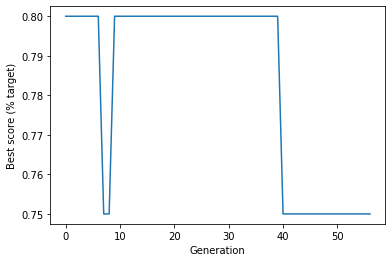

In [37]:
# Set general parameters
population_size = 50
maximum_generation = 15
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0

# AP_width of 1.3 for stim_amp = 0.1 nA and AP_width of 1.6 for stim_amp = 0.5 nA.
stim_amp2 = 0.1 # nA
goal2 = 1.3
stim_amp2 = 0.5 # nA
goal2 = 3

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.3f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    #pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    #best_score = np.min(pop_scores)
    best_score = np.min(fit_scores)
    
    for i in range(len(fit_scores)):
        if fit_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.3f (gna = %.2f, gk = %.2f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()